In [1]:
import zipfile
import os

def unzip_file(zip_file_path, extract_path):
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

zip_file_path = '/content/drive/MyDrive/Data/final_dataset.zip'
extract_path = 'extracted_files'

unzip_file(zip_file_path, extract_path)

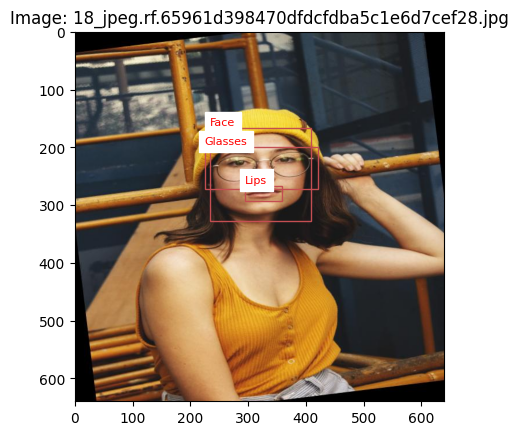

In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_random_image_with_bbox(image_dir, label_dir, class_names):
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print(f"No images found in {image_dir}")
        return

    random_image_file = random.choice(image_files)
    image_path = os.path.join(image_dir, random_image_file)

    label_file_name = os.path.splitext(random_image_file)[0] + '.txt'
    label_path = os.path.join(label_dir, label_file_name)

    if not os.path.exists(label_path):
        print(f"No label found for {random_image_file}")
        return

    try:
        img = Image.open(image_path)
        img_width, img_height = img.size

        fig, ax = plt.subplots(1)
        ax.imshow(img)

        with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                x_center_pixel = x_center * img_width
                y_center_pixel = y_center * img_height
                width_pixel = width * img_width
                height_pixel = height * img_height

                x_min = x_center_pixel - (width_pixel / 2)
                y_min = y_center_pixel - (height_pixel / 2)


                rect = patches.Rectangle((x_min, y_min), width_pixel, height_pixel, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)


                class_name = class_names[int(class_id)] if int(class_id) < len(class_names) else f"Class {int(class_id)}"
                ax.text(x_min, y_min - 5, class_name, color='red', fontsize=8, backgroundcolor='white')

        plt.title(f"Image: {random_image_file}")
        plt.show()
    except Exception as e:
        print(f"Error processing {random_image_file}: {e}")

class_names = ["Face", "Lips", "Glasses"]

image_directory = "/content/extracted_files/train/images"
label_directory = "/content/extracted_files/train/labels"

visualize_random_image_with_bbox(image_directory, label_directory, class_names)


In [3]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
import torch
from ultralytics import YOLO

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_train = YOLO("yolov8n.pt").to(device)

100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]


In [5]:
#model_train.tune(data="/content/extracted_files/data.yaml", epochs=50, iterations=300, optimizer="AdamW", plots=False, save=False, val=False)

In [6]:
data_yaml_path = "/content/extracted_files/data.yaml"
model_train.train(
    data=data_yaml_path,
    epochs=100,
    imgsz=640,
    device=device
    )

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/extracted_files/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, 

100%|██████████| 755k/755k [00:00<00:00, 25.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/extracted_files/train/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 1547.91it/s]

train: New cache created: /content/extracted_files/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/extracted_files/valid/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 3143.68it/s]

val: New cache created: /content/extracted_files/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.32G      1.956      4.201      1.917         37        640: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all          5         15    0.00152      0.133    0.00124   0.000124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.28G      1.836      4.028      1.878         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all          5         15    0.00177      0.133    0.00186   0.000439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.19G       1.75      3.846      1.784         59        640: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all          5         15    0.00539      0.333     0.0127    0.00337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.19G      1.626      3.535      1.574         47        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          5         15    0.00509      0.267      0.129     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.17G      1.433      3.052      1.382         58        640: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all          5         15    0.00779      0.333      0.321       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.19G      1.448      2.519      1.341         53        640: 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          5         15    0.00931      0.333      0.332      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.2G      1.414      2.208      1.368         36        640: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          5         15     0.0103      0.333      0.332      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.19G      1.397      1.966      1.313         36        640: 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          5         15     0.0109      0.333      0.313      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.2G      1.229      1.871      1.242         35        640: 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all          5         15     0.0113      0.333      0.321      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.19G      1.296      1.759      1.275         44        640: 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all          5         15      0.393      0.333      0.313      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.2G      1.386      1.791      1.319         34        640: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          5         15          1      0.129      0.321      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.19G      1.373      1.625      1.302         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all          5         15          1      0.272       0.34      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.2G        1.2      1.553      1.205         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all          5         15          1      0.327       0.34      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.19G      1.196       1.33      1.146         35        640: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all          5         15          1      0.246      0.354      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.2G      1.205      1.377      1.183         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all          5         15          1      0.155      0.364      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.19G      1.183      1.293       1.13         40        640: 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          5         15          1      0.129      0.348      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.2G      1.166      1.333      1.157         37        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.72it/s]

                   all          5         15      0.928      0.333      0.348      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.2G      1.247      1.336      1.204         33        640: 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all          5         15      0.985      0.333      0.437      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.2G      1.186      1.322      1.182         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all          5         15      0.988      0.333      0.492      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.2G      1.191      1.202      1.172         43        640: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all          5         15      0.938      0.333      0.555      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.2G      1.131      1.189      1.117         41        640: 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all          5         15       0.93      0.333      0.468      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.2G      1.134      1.258      1.115         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]

                   all          5         15      0.957      0.333      0.642      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.2G      1.082      1.149        1.1         49        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


                   all          5         15      0.992      0.333      0.793      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.17G      1.084      1.158      1.163         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all          5         15      0.946      0.333      0.728      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.2G      1.103      1.182      1.088         47        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all          5         15      0.949      0.421      0.748      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.2G      1.096      1.135      1.154         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


                   all          5         15      0.919      0.333      0.791      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.2G      1.079       1.17      1.128         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


                   all          5         15      0.874      0.333      0.834      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.2G      1.063      1.109      1.103         30        640: 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          5         15      0.866      0.459      0.849      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.2G       1.06      1.103        1.1         38        640: 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          5         15      0.866      0.459      0.849      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.2G      1.031       1.04      1.034         48        640: 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all          5         15      0.838      0.655      0.854      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.19G      1.096      1.139      1.153         27        640: 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all          5         15      0.897      0.674       0.87      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.2G      1.043     0.9914      1.083         38        640: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          5         15      0.896      0.708      0.849      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.18G     0.9952       1.06      1.087         34        640: 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all          5         15      0.896      0.708      0.849      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.19G      1.089      1.134      1.142         29        640: 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          5         15      0.892      0.649      0.823      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.19G      1.144      1.165      1.164         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all          5         15      0.794      0.752      0.943      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.2G      1.062        1.1      1.062         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all          5         15      0.875      0.736      0.919      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.2G      1.015      1.059      1.061         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all          5         15      0.875      0.736      0.919      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.2G      1.066       1.05      1.099         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all          5         15       0.83      0.908      0.959      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.19G      1.017       1.02      1.078         48        640: 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          5         15      0.827      0.917      0.965      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.2G     0.9994     0.9932       1.12         32        640: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          5         15       0.93        0.8      0.984      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.2G      1.009       1.08      1.097         22        640: 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.81it/s]

                   all          5         15       0.93        0.8      0.984      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.2G     0.9901      1.016      1.077         47        640: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all          5         15      0.864      0.911      0.984      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.19G      1.002     0.9969      1.056         30        640: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          5         15      0.841      0.933      0.984      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.2G     0.9267     0.9125      1.017         56        640: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all          5         15      0.924      0.933      0.984      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.2G     0.9368     0.9013      1.027         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]

                   all          5         15      0.924      0.933      0.984      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.18G     0.9927     0.9799      1.066         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          5         15      0.895      0.867      0.973       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.19G     0.9557     0.9837      1.086         20        640: 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all          5         15      0.975      0.867      0.973      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.2G     0.9361     0.9226      1.069         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all          5         15      0.965      0.962      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.2G     0.9277     0.9584     0.9879         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all          5         15      0.965      0.962      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.2G     0.9557      0.889      1.037         50        640: 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all          5         15        0.9      0.948      0.984      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.19G      0.927     0.9253       1.02         34        640: 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all          5         15      0.962      0.918      0.984      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.2G      0.895     0.8135     0.9865         48        640: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all          5         15      0.937       0.92      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.2G     0.8689     0.9141      1.011         52        640: 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          5         15      0.937       0.92      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.2G     0.9947     0.9295      1.066         36        640: 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all          5         15       0.94      0.922      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.19G      1.016     0.9744      1.093         43        640: 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          5         15      0.927      0.938      0.995      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.2G     0.9724     0.9627      1.025         33        640: 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all          5         15      0.976      0.906      0.984      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.2G     0.8858     0.9154     0.9984         22        640: 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


                   all          5         15      0.976      0.906      0.984      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.2G     0.9167     0.9333      1.086         25        640: 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all          5         15      0.977      0.925      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.19G     0.9117     0.8465      1.032         45        640: 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


                   all          5         15      0.962      0.923      0.995      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.2G     0.8725     0.8726      1.032         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all          5         15      0.978      0.877      0.995      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.2G     0.8703     0.8439       1.01         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all          5         15      0.978      0.877      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.17G     0.8625     0.8554      1.015         39        640: 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all          5         15      0.935      0.846      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.19G      0.825     0.8616      1.019         40        640: 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          5         15      0.939      0.872      0.976      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.2G     0.8847     0.8642      1.017         37        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all          5         15      0.933      0.909      0.976      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.2G     0.9215     0.8299      1.016         29        640: 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          5         15      0.933      0.909      0.976      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.2G     0.8336     0.8111      1.012         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          5         15      0.858      0.925      0.973      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.19G     0.8286     0.7706     0.9751         45        640: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          5         15       0.87      0.916      0.973      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.2G     0.8231     0.7531     0.9656         62        640: 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          5         15      0.963      0.924      0.984      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.2G     0.8534     0.8347     0.9806         51        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all          5         15      0.963      0.924      0.984      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.2G     0.7952     0.7552     0.9753         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          5         15      0.957      0.939      0.995      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.17G      0.763       0.74     0.9733         43        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all          5         15      0.935      0.939      0.995      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.2G     0.7899     0.7398     0.9737         42        640: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all          5         15       0.92      0.936      0.995      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.2G     0.8037     0.7187     0.9976         55        640: 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all          5         15       0.92      0.936      0.995      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.2G     0.8474     0.7588      1.008         42        640: 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all          5         15      0.924      0.924      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.19G     0.8219      0.784      1.005         29        640: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all          5         15      0.939       0.93      0.995      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.2G     0.7939     0.7639      0.992         38        640: 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all          5         15      0.938       0.93      0.995      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.2G     0.8248     0.7775     0.9884         33        640: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all          5         15      0.938       0.93      0.995      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.2G     0.8222     0.7638     0.9601         46        640: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all          5         15      0.882      0.983      0.995      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.19G     0.8621     0.7918      1.042         29        640: 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

                   all          5         15      0.875          1      0.995      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.2G     0.8259     0.8028      1.016         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all          5         15      0.875          1      0.995      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.17G     0.7794     0.8058      1.004         37        640: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]


                   all          5         15      0.875          1      0.995      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.2G     0.7643     0.7286     0.9558         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all          5         15       0.88          1      0.995      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.19G     0.8243     0.7374     0.9873         46        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          5         15      0.895          1      0.995      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.2G     0.8358     0.7426     0.9852         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.46it/s]

                   all          5         15       0.87          1      0.995      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.19G     0.7293      0.711     0.9364         44        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          5         15       0.87          1      0.995      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.2G     0.7439     0.7088     0.9696         41        640: 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          5         15      0.872          1      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.19G     0.7238     0.7133     0.9843         32        640: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          5         15      0.871          1      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.2G     0.6803     0.6745     0.9397         34        640: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.95it/s]

                   all          5         15      0.874          1      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.2G     0.7221     0.6839     0.9454         51        640: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]

                   all          5         15      0.874          1      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.2G     0.7132     0.7242     0.9682         43        640: 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          5         15      0.881          1      0.995      0.623


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.15G     0.6422     0.7077     0.9231         24        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          5         15      0.891          1      0.995      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.16G     0.6534     0.7068     0.9489         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all          5         15      0.897          1      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.16G     0.6856     0.7161     0.8993         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          5         15      0.897          1      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.16G      0.615     0.7126     0.8811         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


                   all          5         15      0.901          1      0.995      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.15G      0.623     0.6784     0.8797         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all          5         15      0.902          1      0.995      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.16G     0.6172     0.6839     0.9346         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all          5         15      0.901      0.998      0.995      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.16G     0.6193     0.6968     0.9269         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          5         15      0.901      0.998      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.16G     0.6641      0.697     0.9037         23        640: 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          5         15      0.901      0.994      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.15G     0.6085     0.6644     0.8973         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all          5         15      0.931      0.995      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.16G     0.6023     0.6642     0.9025         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all          5         15      0.929      0.996      0.995       0.63



100 epochs completed in 0.046 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


                   all          5         15       0.94      0.922      0.995      0.665
                  face          5          5      0.946          1      0.995      0.712
                  lips          5          5          1      0.765      0.995      0.557
            spectacles          5          5      0.874          1      0.995      0.726
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccad72d8c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/istockphoto-1134003578-612x612.jpg: 448x640 1 face, 1 lips, 1 spectacles, 126.1ms
Speed: 16.8ms preprocess, 126.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


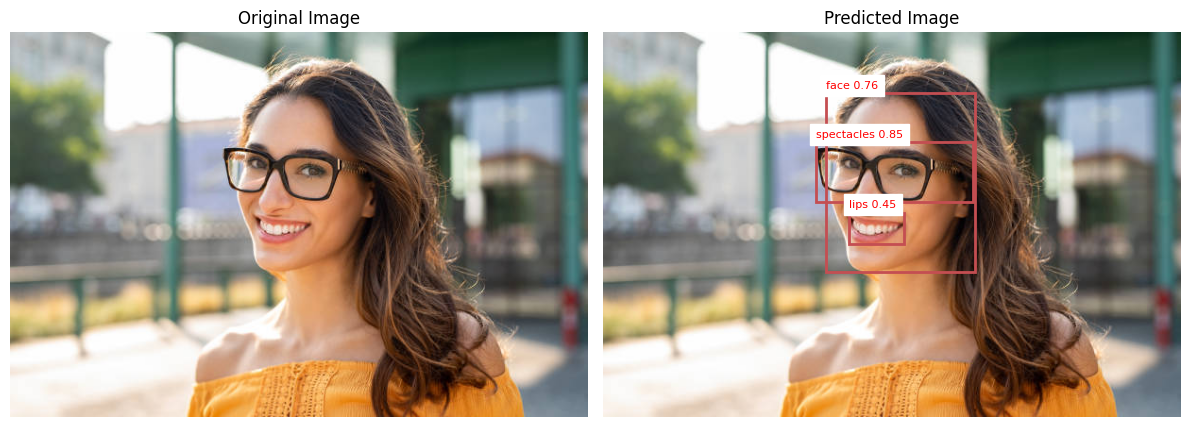

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def predict_and_visualize(image_path, model):
    img = Image.open(image_path)
    results = model.predict(source=image_path, conf=0.25, save=False, save_txt=False)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    ax = axes[1]
    ax.imshow(img)

    for result in results[0].boxes:
        x_min, y_min, x_max, y_max = result.xyxy[0].tolist()
        conf = result.conf.item()
        class_id = int(result.cls.item())
        class_name = model.names[class_id]
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, f"{class_name} {conf:.2f}", color='red', fontsize=8, backgroundcolor='white')

    ax.set_title("Predicted Image")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

uploaded_image_path = "/content/istockphoto-1134003578-612x612.jpg"
predict_and_visualize(uploaded_image_path, model)
